# Pytorch Computer Vision

## 0. Computer Vision libraries in Pytorch

* `torchvision` - base domain library for pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems 
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for pytorch 
* `torch.utils.data.Dataloader` - creates a python iterable over a dataset

In [4]:
# import pytorch 
import torch 
from torch import nn

# import torchvision
import torchvision

# import matplotlib
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.4.0
0.19.0


## 1. Getting a dataset with [pytorch datasets](https://pytorch.org/vision/0.18/datasets.html)

The dataset: FashionMNIST - https://github.com/zalandoresearch/fashion-mnist

In [9]:
# setup training data 
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root="data", # where to download the data to
    train=True,     # do we want the training dataset?
    download=True,      # do we want to download?
    transform=ToTensor(),     # how do we want to transform the data?
    target_transform=None       # how do we want to transform the labels/target?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False, # it's testing dataset
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [16]:
len(train_data), len(test_data)

(60000, 10000)

In [14]:
# see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [31]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [20]:
# check the labels 
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 check input and output shape of data

In [25]:
# check the shape
print(f"image shape: {image.shape} -> [color channels, height, width]")
print(f"image label: {label}")

image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
image label: 9


### 1.2 visualizing the data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

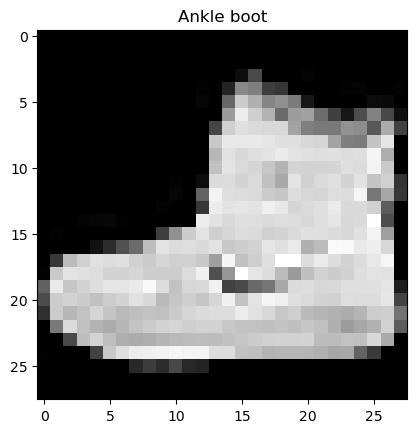

In [32]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray") 
plt.title(class_names[label])
# because matplotplib expects height and width first and the color channels at the last

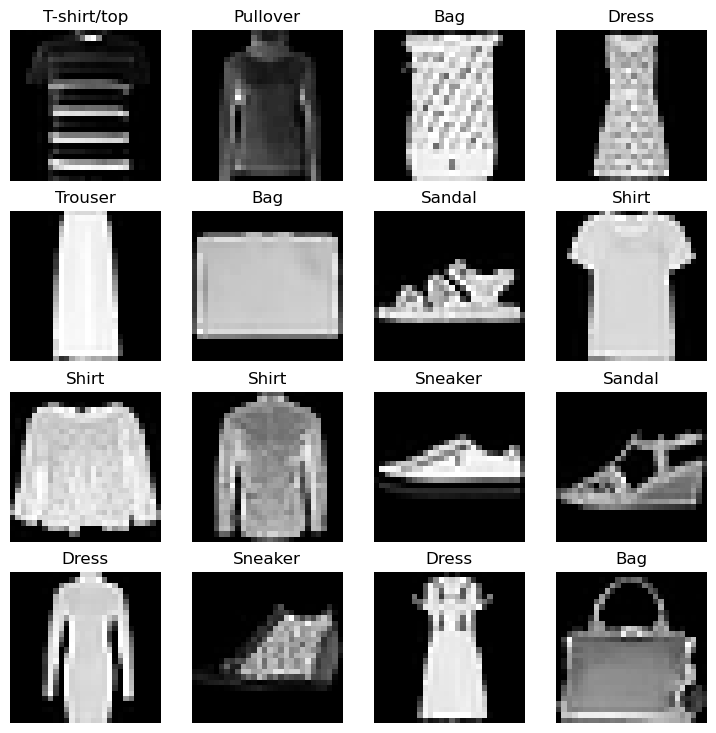

In [33]:
# plot more images 
torch.manual_seed(17)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [35]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare dataloader


Right now, our data is in the form of pytorch datasets.

Dataloader turns our dataset into a python iterable.

More specifically, we want to turn our data into batches (mini-batches) -> turning data into group.

Reason?
1. It's more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60.000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch. 

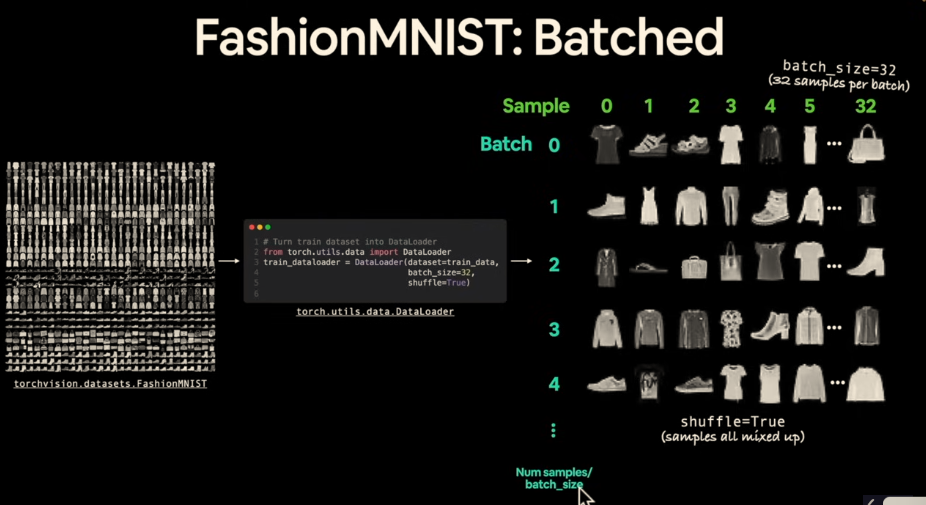

In [44]:
from torch.utils.data import DataLoader

# setup hyperparameter
BATCH_SIZE = 32

# turn datasets into batches
train_dataloader = DataLoader(dataset=train_data,
                                batch_size=BATCH_SIZE,
                                shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False)

len(train_dataloader) # 60.000 / 32

1875

In [45]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000020F10DD7560>, <torch.utils.data.dataloader.DataLoader object at 0x0000020F0CF32900>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [51]:
# check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape # one batch

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Sneaker')

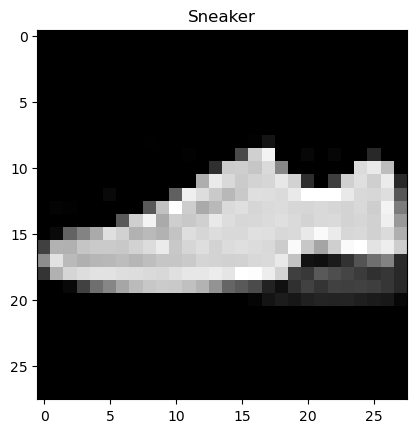

In [63]:
# show a sample
#torch.manual_seed(17)
random_idx = torch.randint(0, len(train_features_batch), size=[1]) # type: ignore
img, label = train_features_batch[random_idx], train_labels_batch[random_idx] # type: ignore
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])


## 3. Model 0: build a baseline model

When starting to build a series of machine learning modelling experiments, it;s best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: **start simply and add complexity when necessary**.

In [64]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a simple sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) # perform forward pass 

print(f"Shape before flattening: {x.shape} -> [color channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color, channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color, channels, height*width]


In [67]:
# baseline model (trial-and-error)
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_units):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(), # everything that goes into this layer stack will be flatten
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [69]:
torch.manual_seed(17)

model_0 = FashionMNISTModelV0(
    input_shape=784, # 28*28,
    output_shape=len(class_names),
    hidden_units=10
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [74]:
dummy_x = torch.randn([1, 1, 28, 28])
flatten_model(dummy_x).shape # same shape as the flattened size

torch.Size([1, 784])

### 3.1 setup loss, optimizer, and evaluation metrics 

* loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* optimizer - our optimizer `torch.optim.SGD()`
* evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [75]:
import requests 
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("the file already exists")
else:
    print("downloading the file")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f: # wb: write binary permission
        f.write(request.content)

the file already exists


In [77]:
# import accuracy metric
from helper_functions import accuracy_fn

# setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

### 3.2 creating a function to time our experiments 

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values)
2. How fast it runs

In [78]:
from timeit import default_timer as timer 
def print_training_time(start: float,
                        end: float, 
                        device: torch.device = None):
    """prints difference between start and end time"""
    total_time = end - start 
    print(f"Training time on {device}: {total_time:.3f} seconds")
    return total_time

In [79]:
start_time = timer()
## some code
end_time = timer()
print_training_time(start_time, end_time, "cpu")

Training time on cpu: 0.000 seconds


1.880002673715353e-05

### 3.3 creating a training loop and training a model on batches of data

1. loop through epochs 
2. loop through training batches, perform training steps, calculate the train loss *per batch*.
3. loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. print out what's happening
5. time it all

In [80]:
# import tqdm for progress bar
from tqdm.auto import tqdm 

# set the seed and start the timer
torch.manual_seed(17)
train_time_start_on_cpu = timer()

# set the number of epochs 
epochs = 3

# create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    ### training 
    train_loss = 0
    # add nested loop through the training batches
    for batch, (image, label) in enumerate(train_dataloader): # 1875 iterations
        model_0.train()
        # forward pass
        y_logits = model_0(image) # 32 images in one hit

        # 2. calculate the loss (per batch)
        loss = loss_fn(y_logits, label)
        train_loss += loss # accumulate the loss

        # 3. optimizer zero grad 
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. optimizer step 
        optimizer.step()

        if batch % 400 == 0: 
            print(f"Looked at {batch * len(image)}/{len(train_dataloader.dataset)} samples.")
    
    # divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader) # the average loss of the total batches (1875)

    ### testing 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for image_test, label_test in test_dataloader:
            # forward pass 
            test_logits = model_0(image_test)

            # calculate the loss
            test_loss += loss_fn(test_logits, label_test)

            # calculate accuracy 
            test_acc += accuracy_fn(y_true=label_test, y_pred=test_logits.argmax(dim=1))
        
        # calculate the test loss average per batch 
        test_loss /= len(test_dataloader)

        # calculate the test acc average per batch 
        test_acc /= len(test_dataloader)
    
    # print out
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, test accuracy: {test_acc:.4f}")

# calcultae the training time 
training_time_end_on_cpu = timer()
print_training_time(start=train_time_start_on_cpu, 
                    end=training_time_end_on_cpu, 
                    device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:08<00:16,  8.25s/it]


Train loss: 0.91556 | Test loss: 0.65202, test accuracy: 77.1965
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:16<00:08,  8.31s/it]


Train loss: 0.57722 | Test loss: 0.55914, test accuracy: 80.4812
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:25<00:00,  8.34s/it]


Train loss: 0.51406 | Test loss: 0.52236, test accuracy: 81.8291
Training time on cpu: 25.017 seconds


25.017234100028872

## 4. make predictions ang get model_0 results

In [106]:
import torch.utils


def eval_model(model: torch.nn.Module,
                data_loader: torch.utils.data,
                loss_fn, 
                accuracy_fn):
    loss, accuracy = 0, 0 

    model.eval()
    with torch.inference_mode():
        for X, y  in tqdm(data_loader):
            logits = model(X)
            loss += loss_fn(logits, y)

            accuracy += accuracy_fn(logits.argmax(dim=1), y)
        
        loss /= len(data_loader)
        accuracy /= len(data_loader)
    
    return{"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_accuracy": accuracy}

In [107]:
model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_0_results

100%|██████████| 313/313 [00:00<00:00, 337.87it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5223580598831177,
 'model_accuracy': 81.82907348242811}

## 5. setup device agnostic code

In [104]:
!nvidia-smi

Sun Aug  4 16:17:43 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.70                 Driver Version: 560.70         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8              2W /   50W |      98MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [103]:
device = "cuda" if torch.cuda.is_available else "cpu"
print(f"current device: {device}")

current device: cuda


## 6. Model 1: Building a better model with non-linearity

In [187]:
# FashionMNISTModelV1
# improvements: added non-linear activation for each linear layer

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape, out_shape, hidden_units = 10):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [188]:
torch.manual_seed(42)

model_v1 = FashionMNISTModelV1(input_shape=784, 
                                out_shape=len(class_names),
                                hidden_units=10).to(device)
model_v1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [189]:
# setup loss function and optimizer 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v1.parameters(),
                            lr=0.1)

In [ ]:
# create training and testing loop of batch size 32

# start_time_on_gpu = timer()
# epochs = 10

# for epoch in tqdm(range(epochs)):

#     model_v1.train()
#     train_loss = 0
#     train_accuracy = 0
    
#     # X is equivalent to train_features_batch, and y is equivalent to train_labels_batch
#     for batch, (X, y) in enumerate(train_dataloader):
#         # send the data to the target device
#         X, y = X.to(device), y.to(device)

#         # feed forward 
#         logits = model_v1(X)

#         # calculate the loss and accuracy 
#         loss = loss_fn(logits, y)
#         train_loss += loss
#         train_accuracy += accuracy_fn(y_true=y, y_pred=logits.argmax(dim=1))

#         # optim zero grad 
#         optimizer.zero_grad()

#         # perform backpropagation and gradient descent for every batch
#         # backprop
#         loss.backward()

#         # gradient descent (optim step)
#         optimizer.step()

#         if batch % 400 == 0:
#             print(f"looked at {batch * 32}/{len(train_dataloader)*32} samples...")

#     train_loss /= len(train_dataloader)
#     train_accuracy /= len(train_dataloader)

#     test_loss, test_accuracy = 0, 0

#     model_v1.eval()
#     with torch.inference_mode():
#         for X_test, y_test in test_dataloader:
#             # send the data to the target device 
#             X_test, y_test = X_test.to(device), y_test.to(device)

#             # feed forward
#             test_logits = model_v1(X_test)

#             # calculate the loss and accuracy
#             test_loss += loss_fn(test_logits, y_test)
#             test_accuracy += accuracy_fn(y_true=y_test, y_pred=test_logits.argmax(dim=1))

#         # calculate the average for all batches       
#         test_loss /= len(test_dataloader)
#         test_accuracy /= len(test_dataloader)
#     print(f"Epoch: {epoch} | Train loss: {train_loss:.2f}, train accuracy: {train_accuracy:.5f} | Test loss: {test_loss:.2f}, test accuracy: {test_accuracy:.5f}")
# end_time_on_gpu = timer()
# print_training_time(start=start_time_on_gpu, end=end_time_on_gpu, device=str(next(model_v1.parameters()).device))


In [190]:
def training_step(model: torch.nn.Module,
                data_loader, 
                optimizer: torch.nn,
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device: torch.device = device):
    # set model to training mode
    model.train()
    # set train_loss and train_accuracy
    train_loss, train_accuracy = 0, 0 

    for batch, (X, y) in enumerate(data_loader):
        # set the data to the device target
        X, y = X.to(device), y.to(device)

        # feed forward 
        logits = model(X)
        # calculate loss
        loss = loss_fn(logits, y)
        # calculate the accuracy
        train_accuracy += accuracy_fn(y_true=y, y_pred=logits.argmax(dim=1))

        # accumulate the loss value per batch 
        train_loss += loss 

        # optimizer zero grad 
        optimizer.zero_grad()

        # perform backpropagation
        loss.backward()

        # perform gradient descent 
        optimizer.step()

        if batch % 400 == 0: 
            print(f"looked at {batch * len(y)}/{len(train_dataloader) * 32} samples...")
    
    # calculate the average for every batch so that for every epoch there will be one single loss value and accuracy
    train_loss /= len(train_dataloader)
    train_accuracy /= len(train_dataloader)
    print(f"Train loss: {train_loss:.2f}, train accuracy: {train_accuracy:.5f}")

In [191]:
def testing_step(model: torch.nn.Module, 
                data_loader: torch.utils.data.DataLoader, 
                loss_fn: torch.nn.Module, 
                accuracy_fn, 
                device: torch.device = device):
    test_loss, test_accuracy = 0, 0 
    
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            # send the data to the target device 
            X_test, y_test = X_test.to(device), y_test.to(device)

            logits = model(X_test)
            test_loss += loss_fn(logits, y_test)
            test_accuracy += accuracy_fn(y_true=y_test, y_pred=logits.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_accuracy:.2f}")


### 6.1 replicate the training and testing loop in modular structure

sometimes you might find that your model trains faster in the CPU rather than in the GPU. This might be caused by some aspects, check out this article - https://horace.io/brrr_intro.html

In [192]:
torch.manual_seed(42)

start_time_on_gpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    training_step(model=model_v1, # type: ignore
                    data_loader=train_dataloader,
                    optimizer=optimizer,
                    loss_fn=loss_fn, 
                    accuracy_fn=accuracy_fn,
                    device=next(model_v1.parameters()).device)
    
    testing_step(model=model_v1, 
                    data_loader=test_dataloader,
                    loss_fn=loss_fn,
                    accuracy_fn=accuracy_fn,
                    device=next(model_v1.parameters()).device)

end_time_on_gpu = timer()
print_training_time(start=start_time_on_gpu, end=end_time_on_gpu, device=str(next(model_v1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...
Train loss: 1.09, train accuracy: 61.34333


 33%|███▎      | 1/3 [00:09<00:19,  9.57s/it]

Test loss: 0.95636 | Test accuracy: 65.00
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...
Train loss: 0.78, train accuracy: 71.92833


 67%|██████▋   | 2/3 [00:20<00:10, 10.26s/it]

Test loss: 0.72227 | Test accuracy: 73.91
looked at 0/60000 samples...
looked at 12800/60000 samples...
looked at 25600/60000 samples...
looked at 38400/60000 samples...
looked at 51200/60000 samples...
Train loss: 0.67, train accuracy: 75.93667


100%|██████████| 3/3 [00:36<00:00, 12.05s/it]

Test loss: 0.68500 | Test accuracy: 75.02
Training time on cuda:0: 36.156 seconds


36.156110499985516